In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import scipy.cluster.hierarchy as clust
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Hamda\anaconda3New\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
reads = pd.read_csv('C:\\Users\\Hamda\\OneDrive\\Documents\\GitHub\\PostDoc\\Conway\\Research\\GIScoring\\Chymera\Data\\Chymera.csv', index_col=0, sep=',')
reads.columns

Index(['ID', 'Library', 'gene1', 'gene2', 'Cas9.Target.Site',
       'Cas9.Guide.Source', 'Cas9.Guide', 'Cas9.Guide.Type',
       'Cpf1.Target.Site', 'Cpf1.Guide', 'Cpf1.Guide.Type', 'CNN.Score',
       'HAP1.Torin.T12A', 'HAP1.Torin.T12B', 'HAP1.Torin.T12C',
       'HAP1.Torin.T18A', 'HAP1.Torin.T18B', 'HAP1.Torin.T18C', 'RPE1.T18A',
       'RPE1.T18B', 'RPE1.T18C', 'RPE1.T24A', 'RPE1.T24B', 'RPE1.T24C',
       'HAP1.T12A', 'HAP1.T12B', 'HAP1.T12C', 'HAP1.T18A', 'HAP1.T18B',
       'HAP1.T18C', 'HAP1.T0', 'RPE1.T0'],
      dtype='object')

In [3]:
reads = reads[[ 'gene1', 'gene2', 'HAP1.T12A', 'HAP1.T12B', 'HAP1.T12C', 'HAP1.T18A', 'HAP1.T18B',
       'HAP1.T18C', 'HAP1.T0']] # remove early time points too as we dont need them
reads


,gene1,gene2,HAP1.T12A,HAP1.T12B,HAP1.T12C,HAP1.T18A,HAP1.T18B,HAP1.T18C,HAP1.T0
Column1,,,,,,,,,
1,RPL4,NaN,7,0,0,3,0,2,9
2,RPL4,NaN,9,2,11,41,0,0,47
3,RPL4,NaN,27,0,2,11,0,7,44
4,RPL4,NegControl,19,21,9,35,9,13,23
5,RPL4,NaN,0,10,8,0,6,3,76
...,...,...,...,...,...,...,...,...,...
92742,RBM41,NegControl,366,373,453,467,431,612,110
92743,RBM41,NegControl,82,70,32,23,68,20,14
92744,RBM41,NegControl,87,51,58,198,44,99,26


In [4]:
reads = reads[(reads['gene1'] != "NT") & (reads['gene2'] != "NT")]
## Remove NTs too
reads.shape
bothNegs = reads[((reads['gene1'] == 'NegControl') & (reads['gene2'] == 'NegControl'))]
#bothNegs.Library.unique()
## also remove rows where both are 
reads = reads[~((reads['gene1'] == 'NegControl') & (reads['gene2'] == 'NegControl'))]
reads.shape

(87477, 9)

In [5]:
reads = reads[(pd.notna(reads['gene1'] )) & (pd.notna(reads['gene2']))]
reads.shape

(58589, 9)

In [6]:
numGuides, numSamples = reads.shape

numGuides, numSamples 

reads.head(10)

,gene1,gene2,HAP1.T12A,HAP1.T12B,HAP1.T12C,HAP1.T18A,HAP1.T18B,HAP1.T18C,HAP1.T0
Column1,,,,,,,,,
4,RPL4,NegControl,19,21,9,35,9,13,23
8,RPL4,NegControl,15,10,4,0,15,10,43
9,NegControl,RPL4,17,37,28,0,43,67,65
10,NegControl,RPL4,0,20,14,0,13,1,40
11,NegControl,RPL4,3,0,3,0,6,0,24
16,GAPDH,NegControl,16,25,0,12,0,9,29
20,GAPDH,NegControl,17,11,11,24,6,41,34
21,NegControl,GAPDH,3,0,0,0,0,0,25
22,NegControl,GAPDH,0,0,0,0,0,0,16


In [7]:
sample_sum = reads.iloc[:,range(2,numSamples)].sum(0)
sample_sum

HAP1.T12A     8306203
HAP1.T12B     8907187
HAP1.T12C     8021702
HAP1.T18A    10002883
HAP1.T18B     9708450
HAP1.T18C     9916630
HAP1.T0       4871322
dtype: int64

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


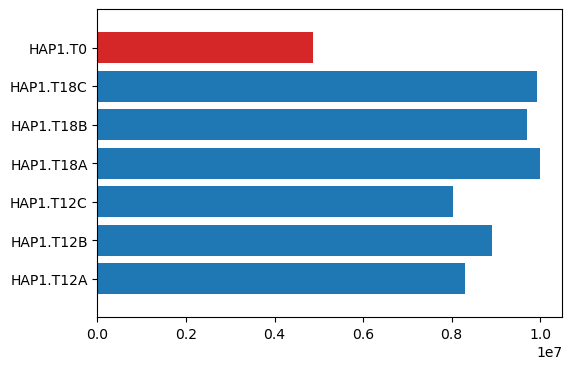

In [8]:
import matplotlib.pyplot as plt
%pylab inline
highlight_index = -1
colors = ['tab:blue'] * len(sample_sum)
colors[highlight_index] = 'tab:red'
figure(figsize = (6,4))
barh( arange(len(sample_sum)), sample_sum, align='center', color = colors)
ylim(-1, len(sample_sum)) # len(sample_sum) = 10
yticks(arange(len(sample_sum)), reads.columns.values[2:], rotation=0)

show()

In [9]:
pseudo=5
reads[reads.columns[2:]] = reads[reads.columns[2:]] + pseudo


In [10]:
reads

,gene1,gene2,HAP1.T12A,HAP1.T12B,HAP1.T12C,HAP1.T18A,HAP1.T18B,HAP1.T18C,HAP1.T0
Column1,,,,,,,,,
4,RPL4,NegControl,24,26,14,40,14,18,28
8,RPL4,NegControl,20,15,9,5,20,15,48
9,NegControl,RPL4,22,42,33,5,48,72,70
10,NegControl,RPL4,5,25,19,5,18,6,45
11,NegControl,RPL4,8,5,8,5,11,5,29
...,...,...,...,...,...,...,...,...,...
92742,RBM41,NegControl,371,378,458,472,436,617,115
92743,RBM41,NegControl,87,75,37,28,73,25,19
92744,RBM41,NegControl,92,56,63,203,49,104,31


In [11]:
numGuides, numSamples = reads.shape

numGuides, numSamples

(58589, 9)

In [12]:
reads['GENE'] = reads.apply(lambda row: f"{row['gene1']}|{row['gene2']}", axis=1)
reads
reads.drop(['gene1', 'gene2'], axis = 1, inplace = True)

In [13]:
reads.columns
reads = reads[['GENE', 'HAP1.T12A', 'HAP1.T12B', 'HAP1.T12C', 'HAP1.T18A', 'HAP1.T18B',
       'HAP1.T18C', 'HAP1.T0']]
reads

,GENE,HAP1.T12A,HAP1.T12B,HAP1.T12C,HAP1.T18A,HAP1.T18B,HAP1.T18C,HAP1.T0
Column1,,,,,,,,
4,RPL4|NegControl,24,26,14,40,14,18,28
8,RPL4|NegControl,20,15,9,5,20,15,48
9,NegControl|RPL4,22,42,33,5,48,72,70
10,NegControl|RPL4,5,25,19,5,18,6,45
11,NegControl|RPL4,8,5,8,5,11,5,29
...,...,...,...,...,...,...,...,...
92742,RBM41|NegControl,371,378,458,472,436,617,115
92743,RBM41|NegControl,87,75,37,28,73,25,19
92744,RBM41|NegControl,92,56,63,203,49,104,31


In [14]:
numGuides, numSamples = reads.shape
meanReads = reads.iloc[:,range(1,numSamples)].mean(0) # colmean

normed = pd.DataFrame(index=reads.index, columns=reads.columns) # empty data frame
normed['GENE'] = reads.iloc[:, 0]

normed[ normed.columns[1:] ] =   (reads.iloc[:, range(1, numSamples)] ) / np.tile(meanReads.values, [numGuides, 1]) * 500  # normalize to mean 500 read
normed.head()

,GENE,HAP1.T12A,HAP1.T12B,HAP1.T12C,HAP1.T18A,HAP1.T18B,HAP1.T18C,HAP1.T0
Column1,,,,,,,,
4,RPL4|NegControl,81.760193,82.787617,49.325365,113.811148,41.006580,51.647693,158.831060
8,RPL4|NegControl,68.133494,47.762086,31.709163,14.226393,58.580828,43.039745,272.281817
9,NegControl|RPL4,74.946844,133.733842,116.266932,14.226393,140.593987,206.590774,397.077649
10,NegControl|RPL4,17.033374,79.603477,66.941567,14.226393,52.722745,17.215898,255.264203
11,NegControl|RPL4,27.253398,15.920695,28.185923,14.226393,32.219455,14.346582,164.503598


In [15]:
fc = pd.DataFrame(index=reads.index, columns=reads.columns[reads.columns != 'HAP1.T0'])#non-normalised
fc['GENE'] = reads['GENE']  # first column is gene name
fc
numFCsamples = fc.shape[1]-1   # number of columns for which to calculate FC
numFCsamples
#fc.head()
pseudo = 0 # remmeber pseudocount is already in the data 
fc.head()
#normed.columns
#fc = fc[['GE

,GENE,HAP1.T12A,HAP1.T12B,HAP1.T12C,HAP1.T18A,HAP1.T18B,HAP1.T18C
Column1,,,,,,,
4,RPL4|NegControl,NaN,NaN,NaN,NaN,NaN,NaN
8,RPL4|NegControl,NaN,NaN,NaN,NaN,NaN,NaN
9,NegControl|RPL4,NaN,NaN,NaN,NaN,NaN,NaN
10,NegControl|RPL4,NaN,NaN,NaN,NaN,NaN,NaN
11,NegControl|RPL4,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
fc[ fc.columns[1:] ] = log2( (normed[ normed.columns[1:-1]] + pseudo) / np.tile( normed[ normed.columns[-1]] + pseudo , [numFCsamples, 1]).T )
fc

,GENE,HAP1.T12A,HAP1.T12B,HAP1.T12C,HAP1.T18A,HAP1.T18B,HAP1.T18C
Column1,,,,,,,
4,RPL4|NegControl,-0.958023,-0.940006,-1.687091,-0.480851,-1.953566,-1.620717
8,RPL4|NegControl,-1.998665,-2.511163,-3.102129,-4.258459,-2.216600,-2.661359
9,NegControl|RPL4,-2.405482,-1.570057,-1.771980,-4.802779,-1.497886,-0.942645
10,NegControl|RPL4,-3.905555,-1.681088,-1.931017,-4.165349,-2.275494,-3.890178
11,NegControl|RPL4,-2.593611,-3.369144,-2.545072,-3.531477,-2.352115,-3.519340
...,...,...,...,...,...,...,...
92742,RBM41|NegControl,0.954155,0.883661,1.306622,1.041729,0.969129,1.440349
92743,RBM41|NegControl,1.459386,1.147800,0.274434,-0.435997,0.988331,-0.587359
92744,RBM41|NegControl,0.833736,0.020068,0.335992,1.715715,-0.293052,0.762956


In [17]:
## Anything with NegControl  is control in this study
fc_base = pd.DataFrame(index=fc.index, columns=fc.columns) # non-normalised
fc_base.iloc[:] = fc.iloc[:]
fc_base
fc_base[['GENE1', 'GENE2']] = fc_base.GENE.str.split("|", expand = True)
fc_base.drop(['GENE'], inplace = True,axis=1)
fc_base
fc_base.loc[fc_base['GENE1'].str.contains('NegControl'), 'GENE1'] = 'control'
fc_base.loc[fc_base['GENE2'].str.contains('NegControl'),'GENE2'] = 'control'

fc_base

,HAP1.T12A,HAP1.T12B,HAP1.T12C,HAP1.T18A,HAP1.T18B,HAP1.T18C,GENE1,GENE2
Column1,,,,,,,,
4,-0.958023,-0.940006,-1.687091,-0.480851,-1.953566,-1.620717,RPL4,control
8,-1.998665,-2.511163,-3.102129,-4.258459,-2.2166,-2.661359,RPL4,control
9,-2.405482,-1.570057,-1.77198,-4.802779,-1.497886,-0.942645,control,RPL4
10,-3.905555,-1.681088,-1.931017,-4.165349,-2.275494,-3.890178,control,RPL4
11,-2.593611,-3.369144,-2.545072,-3.531477,-2.352115,-3.51934,control,RPL4
...,...,...,...,...,...,...,...,...
92742,0.954155,0.883661,1.306622,1.041729,0.969129,1.440349,RBM41,control
92743,1.459386,1.1478,0.274434,-0.435997,0.988331,-0.587359,RBM41,control
92744,0.833736,0.020068,0.335992,1.715715,-0.293052,0.762956,RBM41,control


In [18]:
cells = list([ 'HAP1.T12', 'HAP1.T18'])
cols = list(['GENE1']) + list( ['GENE2']) + cells
cols
fc_merge = pd.DataFrame( columns=cols, index=fc_base.index, dtype=float)
fc_merge.GENE1 = fc_base.GENE1
fc_merge.GENE2 = fc_base.GENE2
fc_merge
for cell in cells:
    samples = [x for x in fc_base.columns if cell in x]
    fc_merge[cell] = fc[ samples ].mean(1)

fc_merge

,GENE1,GENE2,HAP1.T12,HAP1.T18
Column1,,,,
4,RPL4,control,-1.195040,-1.351711
8,RPL4,control,-2.537319,-3.045473
9,control,RPL4,-1.915839,-2.414437
10,control,RPL4,-2.505887,-3.443674
11,control,RPL4,-2.835942,-3.134311
...,...,...,...,...
92742,RBM41,control,1.048146,1.150402
92743,RBM41,control,0.960540,-0.011675
92744,RBM41,control,0.396598,0.728540


In [19]:
is_ctrl = where( (fc_merge.GENE1=='control') | (fc_merge.GENE2=='control') )[0]

is_ctrl1 = where( fc_merge.GENE1=='control' )[0]
is_ctrl2 = where( fc_merge.GENE2=='control' )[0]


smf_gene1 = fc_merge.iloc[is_ctrl2].groupby('GENE1').mean(numeric_only = True) # calculate means of multiple runs of same gene
smf_gene2 = fc_merge.iloc[is_ctrl1].groupby('GENE2').mean(numeric_only = True)


smf_guide1 = fc_merge.iloc[is_ctrl2].groupby('GENE1')
smf_guide2 = fc_merge.iloc[is_ctrl1].groupby('GENE2')

In [20]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
 
intersection(smf_gene2.index, smf_gene1.index)

['AAAS',
 'AACS',
 'AAGAB',
 'AAMDC',
 'AAMP',
 'AAR2',
 'AARS',
 'AASDHPPT',
 'AASS',
 'AATF',
 'ABCA2',
 'ABCA3',
 'ABCB10',
 'ABCB7',
 'ABCC1',
 'ABCC5',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABHD10',
 'ABHD12',
 'ABHD12B',
 'ABHD14B',
 'ABHD17B',
 'ABHD17C',
 'ABHD2',
 'ABI1',
 'ABI2',
 'ABL1',
 'ABL2',
 'ABLIM1',
 'ABR',
 'ABT1',
 'ACAA1',
 'ACAA2',
 'ACACA',
 'ACAD9',
 'ACADM',
 'ACADSB',
 'ACADVL',
 'ACAP2',
 'ACAP3',
 'ACAT1',
 'ACAT2',
 'ACBD3',
 'ACBD6',
 'ACBD7',
 'ACER3',
 'ACIN1',
 'ACLY',
 'ACO1',
 'ACO2',
 'ACOT13',
 'ACOT7',
 'ACOT9',
 'ACOX1',
 'ACP1',
 'ACSL1',
 'ACSL3',
 'ACSL4',
 'ACSL6',
 'ACSS2',
 'ACTB',
 'ACTG1',
 'ACTG2',
 'ACTL6A',
 'ACTN1',
 'ACTN4',
 'ACTR10',
 'ACTR1A',
 'ACTR1B',
 'ACTR2',
 'ACTR3',
 'ACTR6',
 'ACVR1B',
 'ACVR2A',
 'ACVR2B',
 'ADAM10',
 'ADAM15',
 'ADAM17',
 'ADAM9',
 'ADAMTS10',
 'ADAMTS6',
 'ADAMTSL1',
 'ADAMTSL3',
 'ADAP1',
 'ADAP2',
 'ADAR',
 'ADCY3',
 'ADCY7',
 'ADCY9',
 'ADD1',
 'ADD2',
 'ADD3',
 'ADGRA3',
 'A

In [21]:
smf_gene = smf_gene1.join(smf_gene2, lsuffix='_Aposn', rsuffix='_Bposn')
smf_gene # so this dataset has CTRL-GENE as A_549_Bposn and GENE-CTRL a sA_549_APosn

len(smf_gene)
smf_gene

,HAP1.T12_Aposn,HAP1.T18_Aposn,HAP1.T12_Bposn,HAP1.T18_Bposn
GENE1,,,,
AAAS,0.221190,0.049889,0.516474,0.619981
AACS,0.119509,-0.170823,-0.518820,-0.453101
AAGAB,-0.059943,-0.026855,-1.146519,-1.399253
AAMDC,-0.425335,-0.458974,0.279093,0.283040
AAMP,-1.648090,-1.929012,-2.015326,-1.903482
...,...,...,...,...
ZWINT,0.152396,-0.150004,-0.385952,-0.620183
ZYG11B,0.442931,0.697806,-0.066439,-0.213063
ZYX,0.467447,0.306754,-0.573107,-0.629301


HAP1.T12: PearsonRResult(statistic=0.5989074714451579, pvalue=0.0)
HAP1.T18: PearsonRResult(statistic=0.5822590538798208, pvalue=0.0)


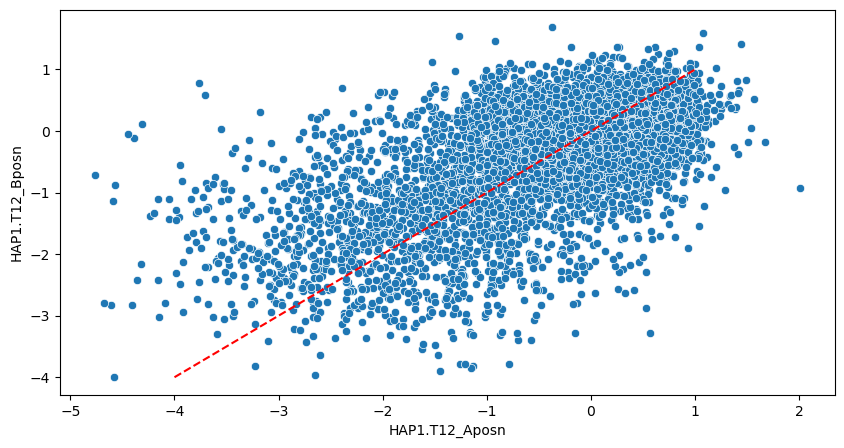

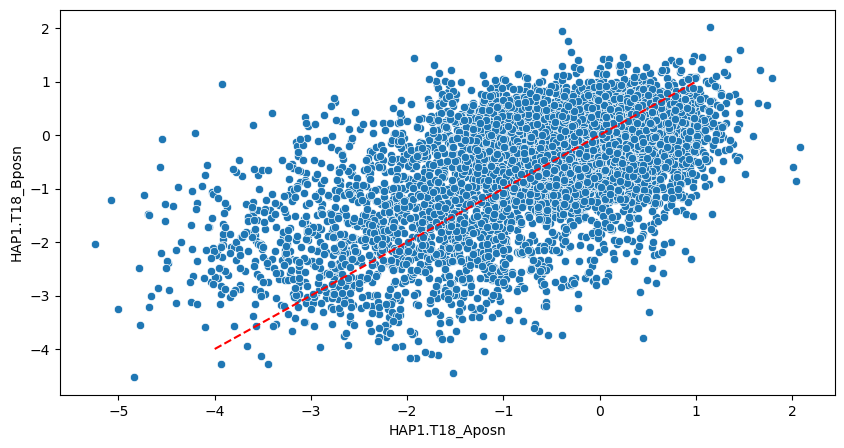

In [22]:
for cell in cells:
    f, ax = pyplot.subplots(figsize=(10,5))
    sns.scatterplot(data=smf_gene, x=cell + '_Aposn',y=cell + '_Bposn', ax=ax)
    plot([-4,1],[-4,1],'r--')
    print(cell + ': ' + str( stats.pearsonr( smf_gene[ cell + '_Aposn' ], smf_gene[cell + '_Bposn' ])) ) 

In [23]:
for cell in cells:
    smf_gene[cell] = smf_gene[ [cell + '_Aposn', cell + '_Bposn'] ].mean(1)
    smf_gene.drop( [cell + '_Aposn', cell + '_Bposn'], axis=1, inplace=True )
    
smf_gene

,HAP1.T12,HAP1.T18
GENE1,,
AAAS,0.368832,0.334935
AACS,-0.199655,-0.311962
AAGAB,-0.603231,-0.713054
AAMDC,-0.073121,-0.087967
AAMP,-1.831708,-1.916247
...,...,...
ZWINT,-0.116778,-0.385094
ZYG11B,0.188246,0.242372
ZYX,-0.052830,-0.161273


In [24]:
pairs = fc_merge[(fc_merge['GENE1'] != "control") & (fc_merge['GENE2'] != "control")] # These are all experiments without control,
pairs =  pairs[["GENE1", "GENE2"]]
pairs =pairs.drop_duplicates(keep='first')
pairs.insert(2, "GENE1_GENE2",np.tile("ZZ",len(pairs)), True)



pairs.columns
for ind in pairs.index:
    g1 = pairs.loc[ind, 'GENE1']
    g2 = pairs.loc[ind, 'GENE2']
    newval = g1 + "_" + g2
    if g1 > g2:
        newval = g2 + "_" + g1
    pairs.loc[ind,"GENE1_GENE2"] = newval
#    print(g1_g2)
#print(pairs.columns)
   
pairs
print(len(pairs))
pairs.drop_duplicates(subset="GENE1_GENE2", keep="first",inplace = True)
print(len(pairs))
pairs

1376
688


,GENE1,GENE2,GENE1_GENE2
Column1,,,
58609,SLC16A1,SLC16A3,SLC16A1_SLC16A3
58655,MDM4,TP53,MDM4_TP53
58701,APC,CTNNB1,APC_CTNNB1
58747,MAP2K1,BRAF,BRAF_MAP2K1
58793,CDK2,CCNE1,CCNE1_CDK2
...,...,...,...
89239,ZDHHC18,ZDHHC14,ZDHHC14_ZDHHC18
89285,ZFR,ZFR2,ZFR_ZFR2
89319,ZFYVE16,ZFYVE9,ZFYVE16_ZFYVE9


In [25]:

dLFC = pd.DataFrame( index=list(pairs.GENE1 + "_" + pairs.GENE2), columns=fc_merge.columns[2:], dtype=float)
smf = smf_gene
for pair_idx in pairs.index:
    g1 = pairs.loc[pair_idx].GENE1
    g2 = pairs.loc[pair_idx].GENE2
    expt_idx  = list( where( ( (fc_merge.GENE1==g1) & (fc_merge.GENE2==g2) )  | ( (fc_merge.GENE1==g2) & (fc_merge.GENE2==g1)  ))[0] )
    
    if ( len(expt_idx)==0 ):
        continue
    smf_sum = smf.loc[g1] + smf.loc[g2]
    expt = fc_merge.iloc[ expt_idx ]
    genepair = g1 + "_" + g2
    dLFC.loc[genepair] = expt.median(0,numeric_only=True) - smf_sum
dLFC


,HAP1.T12,HAP1.T18
SLC16A1_SLC16A3,-1.676203,-1.932656
MDM4_TP53,-0.002273,0.316049
APC_CTNNB1,0.507461,0.621513
MAP2K1_BRAF,-0.283062,-0.051181
CDK2_CCNE1,0.359329,0.630126
...,...,...
ZDHHC18_ZDHHC14,-0.299470,0.039566
ZFR_ZFR2,-0.120702,-0.015988
ZFYVE16_ZFYVE9,-0.115270,-0.039977
ZMIZ2_ZMIZ1,-0.623136,-0.761775


In [26]:
d2 = dLFC.dropna()
print(len(dLFC))
print(len(d2)) 
dLFC.columns

688
688


Index(['HAP1.T12', 'HAP1.T18'], dtype='object')

Text(0, 0.5, 'Count')

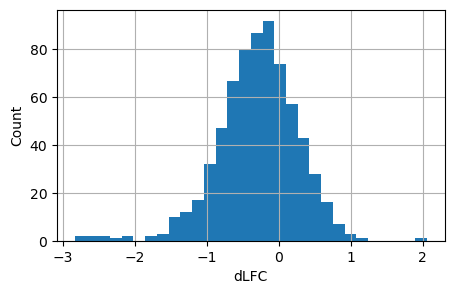

In [27]:
dLFC['HAP1.T12'].hist(bins=30, figsize=(5,3))
xlabel('dLFC')
ylabel('Count')

Text(0, 0.5, 'Count')

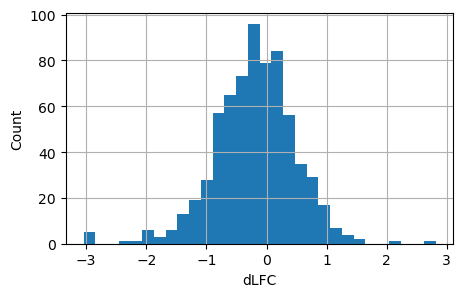

In [28]:
dLFC['HAP1.T18'].hist(bins=30, figsize=(5,3))
xlabel('dLFC')
ylabel('Count')

In [29]:
zdLFC = pd.DataFrame( index=dLFC.index, columns=dLFC.columns, dtype=float ) 
zdLFC.head()

,HAP1.T12,HAP1.T18
SLC16A1_SLC16A3,NaN,NaN
MDM4_TP53,NaN,NaN
APC_CTNNB1,NaN,NaN
MAP2K1_BRAF,NaN,NaN
CDK2_CCNE1,NaN,NaN


In [30]:

percentile =  2.5
for col in zdLFC.columns:
    #print(col)
    top = np.percentile( dLFC.loc[:,col], percentile)
    bot = np.percentile( dLFC.loc[:,col], 100-percentile)
    #print(top,bot)
    mu = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].mean() # This is because our dist is truncated normal
    std = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].std()
    #print(mu, std)
    zdLFC[col] = (dLFC[col] - mu) / std

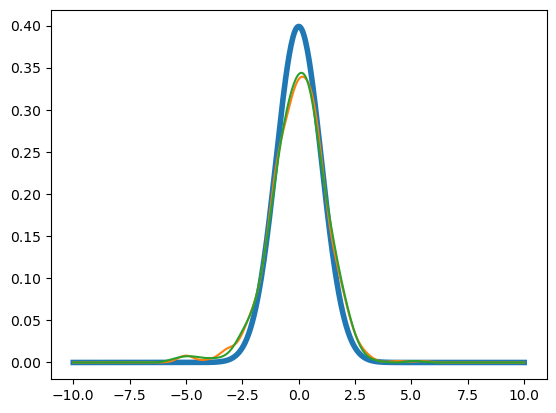

In [31]:
xx = linspace(-10,10,500)
kde_HAP1T18 = stats.gaussian_kde( zdLFC['HAP1.T18'] )
kde_HAP1T12 = stats.gaussian_kde( zdLFC['HAP1.T12'] )

plot( xx, stats.norm.pdf( xx), label='normal', linewidth=4 )
plot( xx, kde_HAP1T18.evaluate(xx), label='HAP1.T18')
plot( xx, kde_HAP1T12.evaluate(xx), label='HAP1.T12')


In [32]:
thresh = -3
HAP1_T18 = set( zdLFC.index[(zdLFC['HAP1.T18'] < thresh)]) 
HAP1_T12 =  set( zdLFC.index[(zdLFC['HAP1.T12'] < thresh)]) 
#zdLFC.index[(zdLFC['RPE1.T18'] < thresh)]
HAP1_T18
#HAP1_T12

{'AP2A2_AP2A1',
 'AP2B1_AP1B1',
 'COQ10B_COQ10A',
 'CUL4A_CUL4B',
 'LDHA_LDHB',
 'PAPSS1_PAPSS2',
 'PITPNA_PITPNB',
 'PTBP1_PTBP2',
 'RAB1A_RAB1B',
 'SAR1A_SAR1B',
 'SEC23A_SEC23B',
 'SLC16A1_SLC16A3',
 'SLC25A37_SLC25A28',
 'TIAL1_TIA1'}

In [33]:
zdLFC

,HAP1.T12,HAP1.T18
SLC16A1_SLC16A3,-3.079870,-3.178437
MDM4_TP53,0.613075,0.908437
APC_CTNNB1,1.737626,1.463598
MAP2K1_BRAF,-0.006388,0.241020
CDK2_CCNE1,1.410824,1.479251
...,...,...
ZDHHC18_ZDHHC14,-0.042587,0.405947
ZFR_ZFR2,0.351803,0.304981
ZFYVE16_ZFYVE9,0.363787,0.261383
ZMIZ2_ZMIZ1,-0.756643,-1.050439


In [34]:
def reindex_alphbetically(df):
    result = []
    for index, row in df.iterrows():
        a, b = index.split('_')
        if a < b:
            result.append(f'{a}_{b}')
        else:
            result.append(f'{b}_{a}')
    
    
    return(result)


zdLFC.index = reindex_alphbetically(zdLFC)
print(zdLFC)
zdLFC.to_csv("zdLFC Output/ChymeraHAP1.csv", index=True)  # Set index=False to exclude the index column


                 HAP1.T12  HAP1.T18
SLC16A1_SLC16A3 -3.079870 -3.178437
MDM4_TP53        0.613075  0.908437
APC_CTNNB1       1.737626  1.463598
BRAF_MAP2K1     -0.006388  0.241020
CCNE1_CDK2       1.410824  1.479251
...                   ...       ...
ZDHHC14_ZDHHC18 -0.042587  0.405947
ZFR_ZFR2         0.351803  0.304981
ZFYVE16_ZFYVE9   0.363787  0.261383
ZMIZ1_ZMIZ2     -0.756643 -1.050439
ZNF503_ZNF703   -0.831336 -0.396113

[688 rows x 2 columns]
